## Import Library

In [58]:
import collections
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from textblob import TextBlob
import string
import numpy as np
from langdetect import detect
%matplotlib inline

## Cleaning data

In [60]:
"""
Hotel Tentrem
Grand Aston Yogyakarta
Melia Purosani Hotel
The Phoenix Hotel Yogyakarta - MGallery Collection
Yogyakarta Marriott Hotel
"""
df = pd.read_csv('dataset/4star/novotel.csv',encoding='latin-1')
df = df.filter(items=['comments'])
df = df.dropna(subset=['comments'])
comments = df['comments'].tolist()

In [61]:
lang = []
for text in comments:
    try:
        x = detect(str(text))
        lang.append(x)
    except:
        lang.append('null')
len(lang)

50

In [62]:
cleancomments = []
for i in comments:
    hasil =i.translate(str.maketrans('', '', string.punctuation))
    cleancomments.append(hasil.lower())
    
newdf = pd.DataFrame(cleancomments,columns=['comments'])
newdf['languange'] = lang
newdf = newdf[(newdf.languange == 'en') | (newdf.languange == 'id')]
newdf.to_csv(r'dataset/wordcloud-b4-novotel.csv', index = False)
comments = newdf['comments'].values
text = str(comments)

In [40]:
# dfen = newdf.loc[newdf['languange'] == 'en']
# dfen
# cmnid = []
# dfid = newdf.loc[newdf['languange'] == 'id']
# listid = dfid['comments'].tolist()
# for cmn in listid:
#     textcmnt = TextBlob(cmn)
#     analysis = textcmnt.translate(from_lang ='id', to = 'en')
#     cmnid.append(analysis)
# dfid = pd.DataFrame(cmnid)
# type(textcmnt)

## Clean Stopwords

In [41]:
# Stopwords
stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said', 'hotel']))
wordcount = {}
for word in text.lower().split():
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

word_counter = collections.Counter(wordcount)

## Word Sentiment Classification

In [50]:
# print(len(wordcount))
dfWordcount = pd.DataFrame.from_dict(wordcount, orient='index',columns=['count'])
# wordcount
wordpos = []
wordneg = []
wordnet = []
for key, val in wordcount.items():
    analysis = TextBlob(key)
    if analysis.sentiment.polarity > 0:
        pos = [key,val]
        wordpos.append(pos)
    elif analysis.sentiment.polarity < 0:
        neg = [key,val]
        wordneg.append(neg)
    else:
        net = [key,val]
        wordnet.append(net)
dfWordcount = pd.DataFrame()
print(len(wordnet))
print(len(wordpos))
print(len(wordneg))

443
57
21


## Dataframe Classification

In [51]:
dfNet = pd.DataFrame (wordnet)
dfNet.columns = ['word','count']
dfNet = dfNet.sort_values(['count'], ascending=False)
# dfNet
dfPos = pd.DataFrame (wordpos)
dfPos.columns = ['word','count']
dfPos = dfPos.sort_values(['count'], ascending=False)
# dfPos
dfNeg = pd.DataFrame (wordneg)
dfNeg.columns = ['word','count']
dfNeg = dfNeg.sort_values(['count'], ascending=False)
dfNet

,word,count
116,staff,15
1,breakfast,12
114,',11
159,location,8
153,bed,8
...,...,...
169,gel,1
168,properly,1
164,shops,1
163,closer,1


## Cleaning Dataframe

In [52]:
dfNet['word'].replace('', np.nan, inplace=True)
dfNet = dfNet.dropna(subset = ['word'])
for char in string.punctuation:
        dfNet['word'] = dfNet['word'].str.replace(char, '')
dfNet.to_csv(r'dataset/wordcount-neutral-hotel-tentrem.csv', index = False)
# dfNet
dfPos['word'].replace('', np.nan, inplace=True)
dfPos = dfPos.dropna(subset = ['word'])
for char in string.punctuation:
        dfPos['word'] = dfPos['word'].str.replace(char, '')
dfPos.to_csv(r'dataset/wordcount-positive-hotel-tentrem.csv', index = False)
# dfNet
dfNeg['word'].replace('', np.nan, inplace=True)
dfNeg = dfNeg.dropna(subset = ['word'])
for char in string.punctuation:
        dfNeg['word'] = dfNeg['word'].str.replace(char, '')
dfNeg.to_csv(r'dataset/wordcount-negative-hotel-tentrem.csv', index = False)
dfNet

,word,count
116,staff,15
1,breakfast,12
114,,11
159,location,8
153,bed,8
...,...,...
169,gel,1
168,properly,1
164,shops,1
163,closer,1


In [53]:
dfNet['word'].replace('', np.nan, inplace=True)
dfNet = dfNet.dropna(subset = ['word'])
for char in string.punctuation:
        dfNet['word'] = dfNet['word'].str.replace(char, '')
dfNet.to_csv(r'dataset/wordcount-neutral-hotel-tentrem.csv', index = False)
dfNet

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,word,count
116,staff,15
1,breakfast,12
159,location,8
153,bed,8
36,check,7
...,...,...
169,gel,1
168,properly,1
164,shops,1
163,closer,1


## Visualization

Top Words Visualization


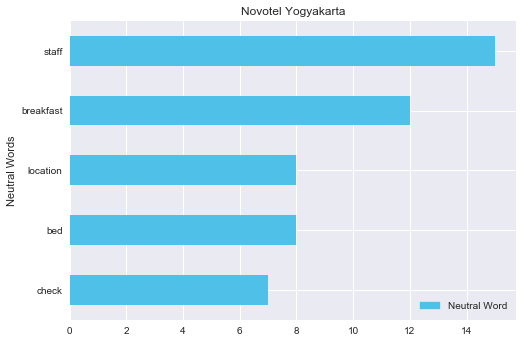

Positive Words Visualization


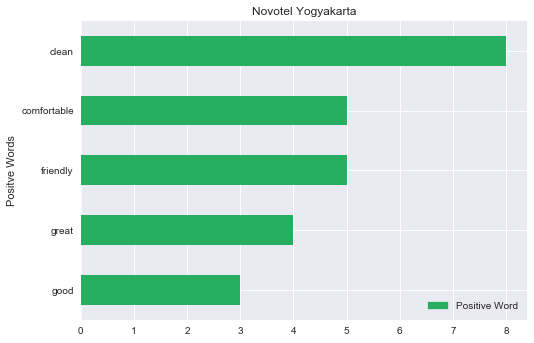

Negative Words Visualization


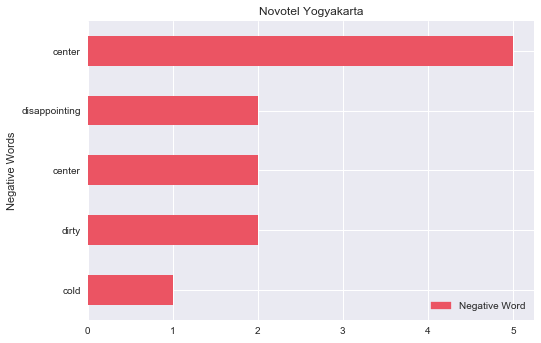

In [55]:
print('Top Words Visualization')
netPlot = dfNet[0:5]
topNet = netPlot.plot(x='word',y='count', kind='barh', color ='#4fc0e8').invert_yaxis()
plt.style.use('seaborn')
plt.title('Novotel Yogyakarta')
neutral = mpatches.Patch(color='#4fc0e8', label='Neutral Word')
plt.legend(handles=[neutral])
plt.ylabel('Neutral Words')
plt.savefig("plot/Novotel Yogyakarta-Neutral.png")
plt.show()

print('Positive Words Visualization')
posPlot = dfPos[0:5]
topPos = posPlot.plot(x='word',y='count', kind='barh', color ='#27ae60').invert_yaxis()
plt.style.use('seaborn')
plt.title('Novotel Yogyakarta')
positive = mpatches.Patch(color='#27ae60', label='Positive Word')
plt.legend(handles=[positive])
plt.ylabel('Positve Words')
plt.savefig("plot/Novotel Yogyakarta-Positive.png")
plt.show()

print('Negative Words Visualization')
negPlot = dfNeg[0:5]
topNeg = negPlot.plot(x='word',y='count', kind='barh', color ='#eb5463').invert_yaxis()
plt.style.use('seaborn')
plt.title('Novotel Yogyakarta')
negative = mpatches.Patch(color='#eb5463', label='Negative Word')
plt.legend(handles=[negative])
plt.ylabel('Negative Words')
plt.savefig("plot/Novotel Yogyakarta-Negative.png")
plt.show()
